In [8]:
%pip install scikit-image

  Using cached scikit_image-0.19.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.0 MB)
  Using cached PyWavelets-1.3.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.9 MB)
     |████████████████████████████████| 195 kB 197 kB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 480 kB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 637 kB/s eta 0:00:01
ERROR: imageio 2.19.3 has requirement pillow>=8.3.2, but you'll have pillow 7.0.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


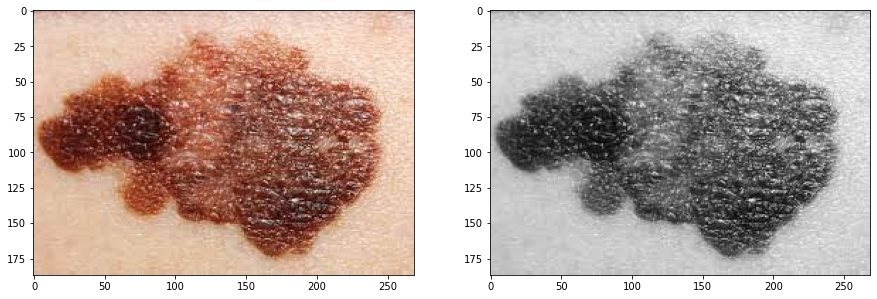

In [12]:
# Importing Necessary Libraries
from skimage import data
import keras
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
skin = keras.utils.load_img("/home/jyoti/Downloads/download.jpeg" )
plt.subplot(1, 2, 1)

# Displaying the sample image
plt.imshow(skin)

# Converting RGB image to Monochrome
gray_coffee = rgb2gray(skin)
plt.subplot(1, 2, 2)

# Displaying the sample image - Monochrome
# Format
plt.imshow(gray_coffee, cmap="gray")


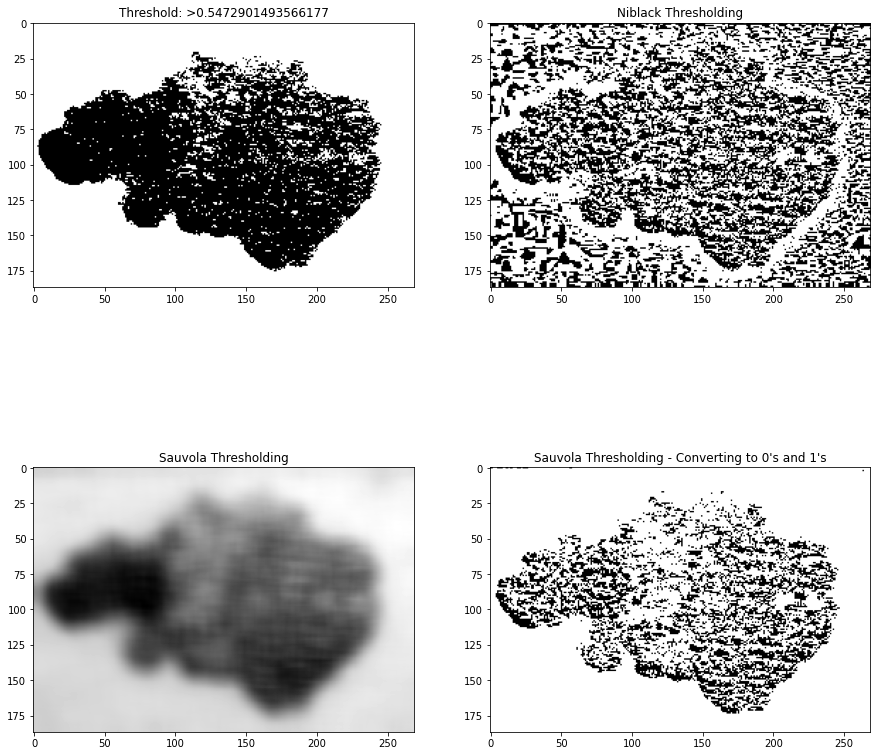

In [13]:
# Importing necessary libraries
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Setting plot size to 15, 15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
skin = keras.utils.load_img("/home/jyoti/Downloads/download.jpeg" )
gray_coffee = rgb2gray(skin)

# Computing Otsu's thresholding value
threshold = filters.threshold_otsu(gray_coffee)

# Computing binarized values using the obtained
# threshold
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))

# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")

# Computing Ni black's local pixel
# threshold values for every pixel
threshold = filters.threshold_niblack(gray_coffee)

# Computing binarized values using the obtained
# threshold
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")

# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")

# Computing Sauvola's local pixel threshold
# values for every pixel - Not Binarized
threshold = filters.threshold_sauvola(gray_coffee)
plt.subplot(2,2,3)
plt.title("Sauvola Thresholding")

# Displaying the local threshold values
plt.imshow(threshold, cmap = "gray")

# Computing Sauvola's local pixel
# threshold values for every pixel - Binarized
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,4)
plt.title("Sauvola Thresholding - Converting to 0's and 1's")

# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")


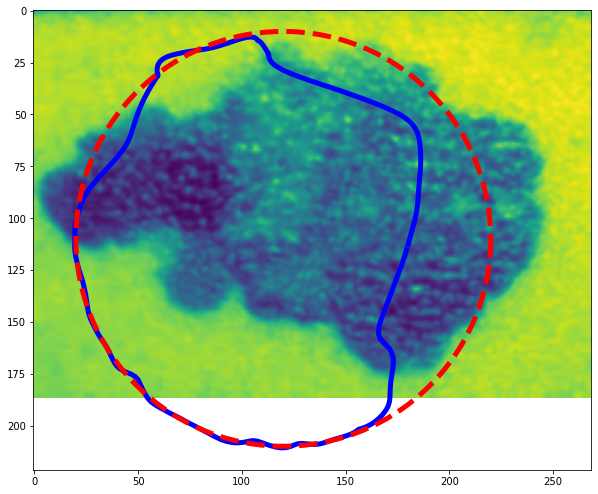

In [18]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

# Sample Image of scikit-image package
skin = keras.utils.load_img("/home/jyoti/Downloads/download.jpeg" )
gray_astronaut = rgb2gray(skin)

# Applying Gaussian Filter to remove noise
gray_astronaut_noiseless = gaussian(gray_astronaut, 1)

# Localising the circle's center at 100, 100
x1 = 120 + 100*np.cos(np.linspace(0, 2*np.pi, 300))
x2 = 110 + 100*np.sin(np.linspace(0, 2*np.pi, 300))

# Generating a circle based on x1, x2
snake = np.array([x1, x2]).T

# Computing the Active Contour for the given image
astronaut_snake = active_contour(gray_astronaut_noiseless,
								snake)

fig = plt.figure(figsize=(10, 10))

# Adding subplots to display the markers
ax = fig.add_subplot(111)

# Plotting sample image
ax.imshow(gray_astronaut_noiseless)

# Plotting the face boundary marker
ax.plot(astronaut_snake[:, 0],
		astronaut_snake[:, 1],
		'-b', lw=5)

# Plotting the circle around face
ax.plot(snake[:, 0], snake[:, 1], '--r', lw=5)
